In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

from labcodes.fileio import DataDirectory, LogFile, LogName
from labcodes.misc import random_smooth_line

Path("demo_dir").mkdir()  # temp dir for later use.

`LogFile` created with data only.
`indeps` is required for quick plot.

<LogFile #0, Untitled>

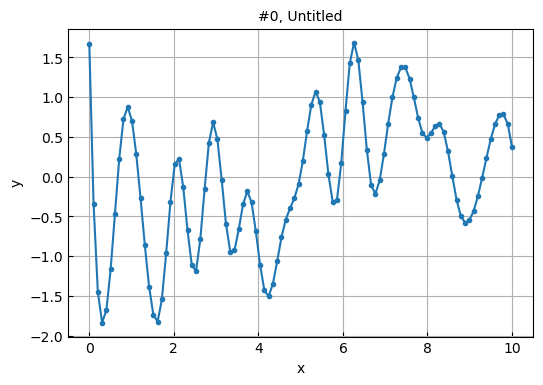

In [2]:
df = pd.DataFrame(
    {
        "x": np.linspace(0, 10, 100),
        "y": random_smooth_line(100),
    }
)
lf = LogFile(df, indeps="x")
lf.plot()
lf

An empty dict is ready for metadatas.
File name is controlled by `lf.name`

In [3]:
lf.meta["date"] = "2021-10-10"
lf.meta["power"] = 0.5
lf.meta["xtalk"] = np.eye(3)

lf.name.title = "1d random"
p = lf.save("demo_dir")
p

WindowsPath('demo_dir/#0, 1d random.feather')

Saving LogFile produces a json file and a feather file.

Things can be retrived with a given path.

OrderedDict([('date', '2021-10-10'),
             ('power', 0.5),
             ('xtalk',
              array([[1., 0., 0.],
                     [0., 1., 0.],
                     [0., 0., 1.]])),
             ('_indeps', ['x']),
             ('_deps', ['y'])])

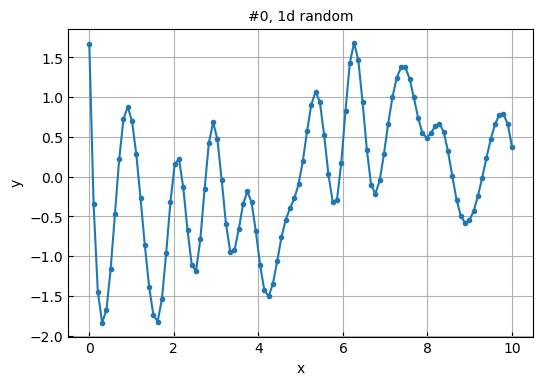

In [4]:
lf2 = LogFile.load(p)
lf2.plot()
lf2.meta

Notice `meta` comes back with two new keys "_indeps" and "_deps",
which is perserved keys for reconstructing the object.

Another common use case is do data logging with log file.

Just as shown below.

(0, 0) 10
(1010, 3) 0
imshow


<Axes: title={'center': '#0, Untitled'}, xlabel='a', ylabel='b'>

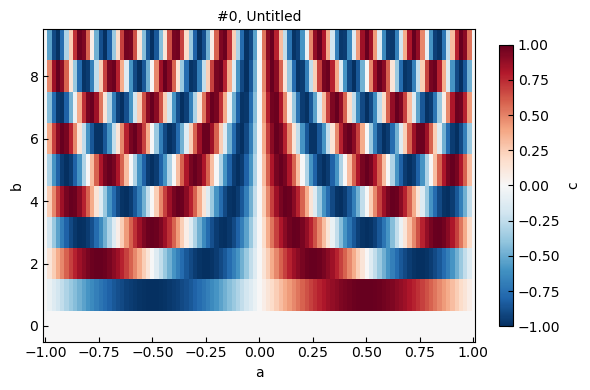

In [5]:
lf3 = LogFile(pd.DataFrame(), ["a", "b"], "c")
a = np.linspace(-1, 1, 101)
for b in range(10):
    lf3.append(a=a, b=b, c=np.sin(a * b * np.pi))

print(lf3.df.shape, len(lf3.data_to_flush))

lf3.flush()

print(lf3.df.shape, len(lf3.data_to_flush))

lf3.plot()

We start by creating a empty log file, then append data to it.

Appended data must be flushed before further plotting or saving.

Now let's turn to more log files, in a single folder.

We want to save the log files in different names so we can distinguish them.
Just as below.

In [6]:
p = lf3.save("demo_dir/arbitrary name.feather")
LogFile.load(p)

<LogFile #0, arbitrary name>

The file name above is rather arbitrary, and cannot be parsed for id or title.

A more proper way is defining the lf.name

In [7]:
lf3.name = LogName(1, "2d sine")
lf3.save("demo_dir")

WindowsPath('demo_dir/#1, 2d sine.feather')

Only file name like "#{id}, {title}" can be parsed, hence recognized by `DataDirectory`

In [8]:
dirc = DataDirectory("demo_dir")
dirc.find_paths("*")

[WindowsPath('demo_dir/#0, 1d random.feather'),
 WindowsPath('demo_dir/#1, 2d sine.feather')]

With `DataDirectory`, it is easy to find certain logfile.

imshow


<Axes: title={'center': '#1, 2d sine'}, xlabel='a', ylabel='b'>

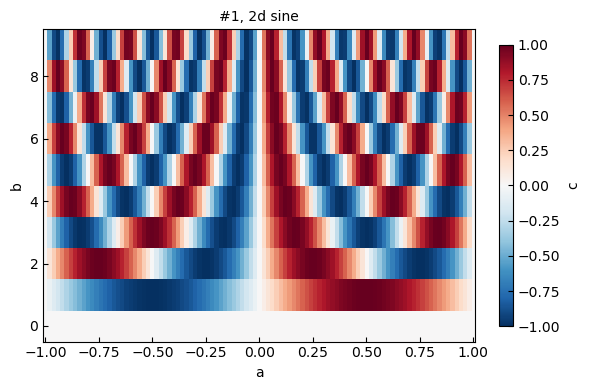

In [9]:
lf = dirc.logfile(1, "sine")
lf.plot()

Creating new log file without corrupt the coherence of id system as follows.

In [10]:
lf = dirc.new("test new", ["x"], ["y"])
lf.append(x=np.linspace(0, 10, 100), y=random_smooth_line(100))
lf.flush()
p = lf.save()